In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy import ndimage, misc
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [6]:
file_list = os.listdir('train')

In [4]:
#Make the TRAIN dataset
trainX=[]
trainY=[]
count=0
for f in file_list:
            if(count%100)==0:
                print(count)                
            count+=1
            
            #Read train image
            image = ndimage.imread('train/'+f, mode="RGB")
            #Resize it
            image_resized = misc.imresize(image, (50, 50))
            #Grayscale it
            gray = rgb2gray(image_resized)
            #Flatten to ease input
            gray = np.array(gray).flatten()
            #Make X
            trainX.append(gray)
            
            #Make corresponding Y
            if('cat' in f):
                trainY.append(0)
            else:
                trainY.append(1)
    

0


/home/akmohanty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/akmohanty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  del sys.path[0]


ValueError: 'arr' does not have a suitable array shape for any mode.

In [ ]:
#Make the TEST dataset
testX=[]
testY=[]
count=0
file_list = os.listdir('test')
for f in file_list:
            if(count%100)==0:
                print(count)                
            count+=1
            
            #Read train image
            image = ndimage.imread('test/'+f, mode="RGB")
            #Resize it
            image_resized = misc.imresize(image, (50, 50))
            #Grayscale it
            gray = rgb2gray(image_resized)
            #Flatten to ease input
            gray = np.array(gray).flatten()
            #Make X
            testX.append(gray)
            
            #Make corresponding Y
            if('cat' in f):
                testY.append(0)
            else:
                testY.append(1)
testX = np.array(testX)
testY = np.array(testY)

In [ ]:
testX.shape

In [ ]:
#Dump the datasets into the hard-disk for later use
import pickle
with open('trainX.pkl','wb') as f:
    pickle.dump(trainX,f)
with open('trainY.pkl','wb') as f:
    pickle.dump(trainY,f)
with open('testX.pkl','wb') as f:
    pickle.dump(testX,f)
with open('testY.pkl','wb') as f:
    pickle.dump(testY,f)

In [24]:
import pickle
with open('trainX.pkl','rb') as f:
    trainX = pickle.load(f)
with open('trainY.pkl','rb') as f:
    trainY = pickle.load(f)
with open('testX.pkl','rb') as f:
    testX = pickle.load(f)
with open('testY.pkl','rb') as f:
    testY = pickle.load(f)

In [25]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(2500, 25000)
(1, 25000)
(2500, 12500)
(1, 12500)


In [26]:
trainX = trainX.reshape(trainX.shape[1],trainX.shape[0])
trainY = trainY.reshape(trainY.shape[1],trainY.shape[0])
testX = testX.reshape(testX.shape[1],testX.shape[0])
testY = testY.reshape(testY.shape[1],testY.shape[0])

In [27]:
testX = trainX[-5000:]
testY = trainY[-5000:]
trainX = trainX[:-5000]
trainY = trainY[:-5000]

In [28]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(20000, 2500)
(20000, 1)
(5000, 2500)
(5000, 1)


In [29]:
def minmaxscale(X):
    X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
    return X

In [30]:
trainX = minmaxscale(trainX)
testX = minmaxscale(testX)

In [31]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))   
    return s

In [32]:
def initialize_with_zeros(dim):
    

    w = np.zeros(shape=(dim, 1))
    b = 0
    
    return w, b

In [33]:
def propagate(w, b, X, Y):
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    
    A = sigmoid(np.dot(X, w) + b)  # compute activation

    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###
    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [34]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 1 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [38]:
from sklearn.metrics import confusion_matrix
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[1])
    print("INITIAL PARAMETERS")
    print(w)
    print(w.shape)
    print(b)    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print(confusion_matrix(Y_train, Y_prediction_train))
    print(confusion_matrix(Y_test, Y_prediction_test))
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [39]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((m, 1))
    

    A = sigmoid(np.dot(X,w) + b)
    
    for i in range(A.shape[0]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[i, 0] = 1 if A[i, 0] > 0.5 else 0
    
    
    return Y_prediction

INITIAL PARAMETERS
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(2500, 1)
0
Cost after iteration 0: 0.693147
Cost after iteration 1: 0.692683
Cost after iteration 2: 0.692312
Cost after iteration 3: 0.691971
Cost after iteration 4: 0.691649
Cost after iteration 5: 0.691343
Cost after iteration 6: 0.691051
Cost after iteration 7: 0.690772
Cost after iteration 8: 0.690506
Cost after iteration 9: 0.690250
Cost after iteration 10: 0.690006
Cost after iteration 11: 0.689771
Cost after iteration 12: 0.689545
Cost after iteration 13: 0.689328
Cost after iteration 14: 0.689119
Cost after iteration 15: 0.688917
Cost after iteration 16: 0.688722
Cost after iteration 17: 0.688533
Cost after iteration 18: 0.688351
Cost after iteration 19: 0.688174
Cost after iteration 20: 0.688003
Cost after iteration 21: 0.687836
Cost after iteration 22: 0.687675
Cost after iteration 23: 0.687518
Cost after iteration 24: 0.687365
Cost after iteration 25: 0.687217
Cost after iteration 26: 0.687072
Cost after iteratio

Cost after iteration 236: 0.678140
Cost after iteration 237: 0.678127
Cost after iteration 238: 0.678114
Cost after iteration 239: 0.678102
Cost after iteration 240: 0.678089
Cost after iteration 241: 0.678076
Cost after iteration 242: 0.678063
Cost after iteration 243: 0.678051
Cost after iteration 244: 0.678038
Cost after iteration 245: 0.678026
Cost after iteration 246: 0.678014
Cost after iteration 247: 0.678001
Cost after iteration 248: 0.677989
Cost after iteration 249: 0.677977
Cost after iteration 250: 0.677965
Cost after iteration 251: 0.677953
Cost after iteration 252: 0.677941
Cost after iteration 253: 0.677929
Cost after iteration 254: 0.677917
Cost after iteration 255: 0.677906
Cost after iteration 256: 0.677894
Cost after iteration 257: 0.677883
Cost after iteration 258: 0.677871
Cost after iteration 259: 0.677860
Cost after iteration 260: 0.677848
Cost after iteration 261: 0.677837
Cost after iteration 262: 0.677826
Cost after iteration 263: 0.677815
Cost after iteration

Cost after iteration 472: 0.676313
Cost after iteration 473: 0.676308
Cost after iteration 474: 0.676303
Cost after iteration 475: 0.676298
Cost after iteration 476: 0.676293
Cost after iteration 477: 0.676288
Cost after iteration 478: 0.676284
Cost after iteration 479: 0.676279
Cost after iteration 480: 0.676274
Cost after iteration 481: 0.676269
Cost after iteration 482: 0.676265
Cost after iteration 483: 0.676260
Cost after iteration 484: 0.676255
Cost after iteration 485: 0.676251
Cost after iteration 486: 0.676246
Cost after iteration 487: 0.676241
Cost after iteration 488: 0.676237
Cost after iteration 489: 0.676232
Cost after iteration 490: 0.676227
Cost after iteration 491: 0.676223
Cost after iteration 492: 0.676218
Cost after iteration 493: 0.676213
Cost after iteration 494: 0.676209
Cost after iteration 495: 0.676204
Cost after iteration 496: 0.676200
Cost after iteration 497: 0.676195
Cost after iteration 498: 0.676191
Cost after iteration 499: 0.676186
Cost after iteration

Cost after iteration 710: 0.675403
Cost after iteration 711: 0.675400
Cost after iteration 712: 0.675397
Cost after iteration 713: 0.675394
Cost after iteration 714: 0.675391
Cost after iteration 715: 0.675387
Cost after iteration 716: 0.675384
Cost after iteration 717: 0.675381
Cost after iteration 718: 0.675378
Cost after iteration 719: 0.675375
Cost after iteration 720: 0.675372
Cost after iteration 721: 0.675369
Cost after iteration 722: 0.675366
Cost after iteration 723: 0.675363
Cost after iteration 724: 0.675360
Cost after iteration 725: 0.675357
Cost after iteration 726: 0.675353
Cost after iteration 727: 0.675350
Cost after iteration 728: 0.675347
Cost after iteration 729: 0.675344
Cost after iteration 730: 0.675341
Cost after iteration 731: 0.675338
Cost after iteration 732: 0.675335
Cost after iteration 733: 0.675332
Cost after iteration 734: 0.675329
Cost after iteration 735: 0.675326
Cost after iteration 736: 0.675323
Cost after iteration 737: 0.675320
Cost after iteration

Cost after iteration 946: 0.674749
Cost after iteration 947: 0.674747
Cost after iteration 948: 0.674744
Cost after iteration 949: 0.674742
Cost after iteration 950: 0.674739
Cost after iteration 951: 0.674737
Cost after iteration 952: 0.674734
Cost after iteration 953: 0.674732
Cost after iteration 954: 0.674729
Cost after iteration 955: 0.674727
Cost after iteration 956: 0.674724
Cost after iteration 957: 0.674722
Cost after iteration 958: 0.674719
Cost after iteration 959: 0.674717
Cost after iteration 960: 0.674714
Cost after iteration 961: 0.674712
Cost after iteration 962: 0.674709
Cost after iteration 963: 0.674707
Cost after iteration 964: 0.674704
Cost after iteration 965: 0.674702
Cost after iteration 966: 0.674700
Cost after iteration 967: 0.674697
Cost after iteration 968: 0.674695
Cost after iteration 969: 0.674692
Cost after iteration 970: 0.674690
Cost after iteration 971: 0.674687
Cost after iteration 972: 0.674685
Cost after iteration 973: 0.674682
Cost after iteration

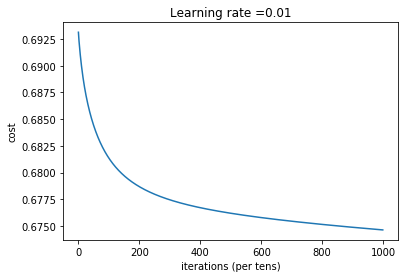

In [40]:
d = model(trainX, trainY, testX, testY, num_iterations = 1000, learning_rate = 0.01, print_cost = True)